Step 1: Import packages
===

- Numpy` is used for the vectors
- `scipy` is unused here, but is common
- `matpllotlib.pyplot` is used for plotting

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Step 2: Problem description
===
Here you will set up the problem for
$$ u_t + c u_x = 0$$
with periodic BC on the interval [0,1]

In [2]:
c = 1.0
T = 1.0 / c # end time

Step 3: Set up the grid
===
dx will be the grid spacing in the $x$-direction  
x will be the grid coordinates  
xx will be really fine grid coordinates

In [3]:
nx = 82
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

Now define an initial condition

In [4]:
def f(x):
    u = np.zeros(x.shape)
    u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    return u

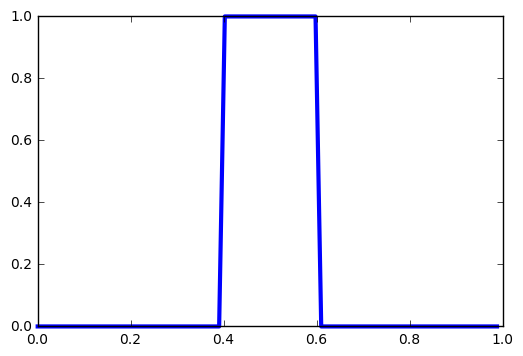

In [5]:
plt.plot(x, f(x), lw=3, clip_on=False)

Step 4: Setting dt
===
Now we need a time step.  Let
$$ \Delta t = \Delta x \frac{\lambda}{c}$$
So we need a parameter $\lambda$

<span style="color:red">What happens when $\lambda>1.0$?</span>

In [6]:
#lmbda = 0.93
lmbda = 1.03
dt = dx * lmbda / c
nt = int(T/dt)
print('T = %g' % T)
print('tsteps = %d' % nt)
print('    dx = %g' % dx)
print('    dt = %g' % dt)
print('lambda = %g' % lmbda)

T = 1
tsteps = 79
    dx = 0.0121951
    dt = 0.012561
lambda = 1.03


Now make an index list, called $J$, so that we can access $J+1$ and $J-1$ easily

In [7]:
J = np.arange(0, nx - 1)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

Step 5: Run and Animate
===
For ipython notebooks be sure to use clear_output.  Alternatively, `animation` from `matplotlib` may be useful.

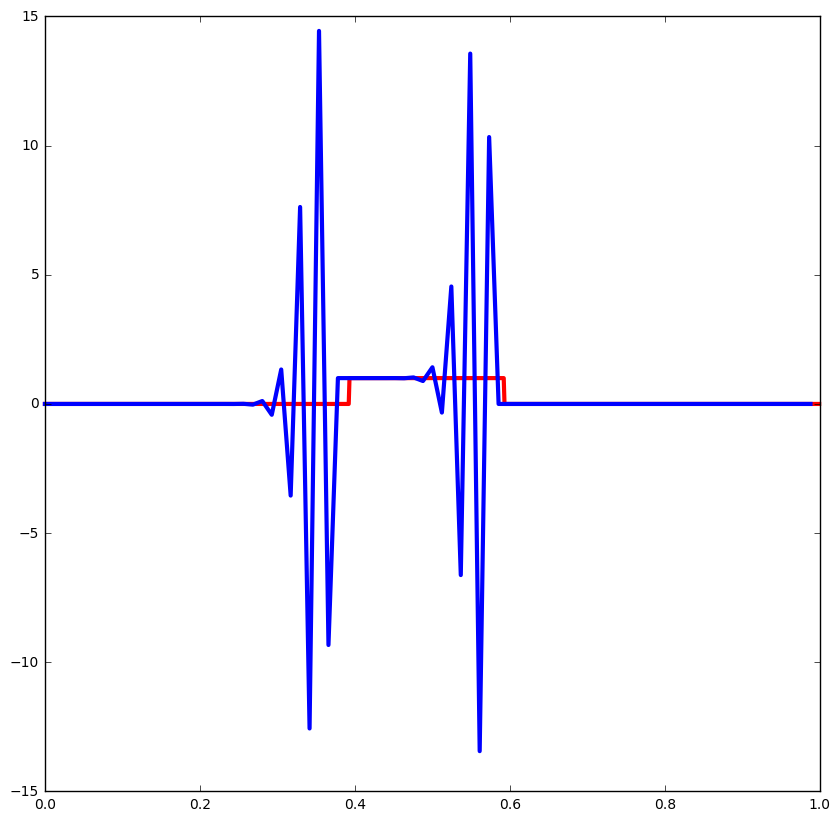

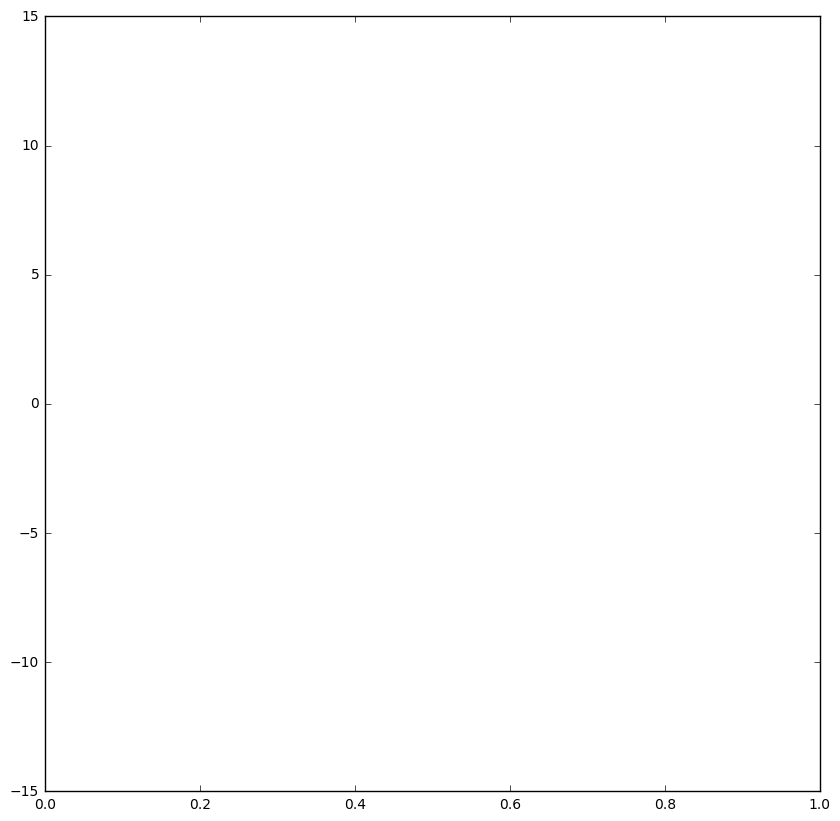

In [8]:
import time
from IPython.display import clear_output, display
method = 'FTBS'
plotit = True
u = f(x)
if plotit:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_title('u vs x')

for n in range(0, nt):
    
    if method == 'FTBS':
        u[J] = u[J] - lmbda * (u[J] - u[Jm1])  # FTBS
        
    uex = f((xx - c * (n+1) * dt) % 1.0)
    if plotit:
        ax.plot(xx, uex, 'r-', lw=3, clip_on=False)
        ax.plot(x, u, '-', lw=3, clip_on=False)
        clear_output(True)
        display(fig)
        ax.cla()

Step 6: Check the error
===

In [9]:
uex = f((x - c * (n+1) * dt) % 1.0)
error = u - uex
l2err = np.sqrt(dx * np.sum(error**2))
print(l2err)

3.58713369213
